In [1]:
"""This program will generate CDF and PDF distributions for a given dataset, allowing us to do survival analysis"""
import pandas as pd
import keras 
import numpy as np
import matplotlib.pyplot as plt
import sklearn    
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

/home/abhishek/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
class CDF:
    
   def  __init__(self,X,Y,c):
        
        self.X = X
        self.Y = Y
        self.c = c
        np.random.seed(7)
        import ANN
        self.c = ANN.ANN(self.X,self.Y,[1,5,1],input_activation=None,hidden_layers_activation='sigmoid',output_activation=None,loss='mean_squared_error',optimizer='RMSprop',epochs=100,batch_size=50)
   def predict_CDF(self,P):
        
        data = self.c.predict(P)
        data = np.array(data)
        survival = 1-data
        result = (np.all(np.diff(data) > 0))
        if(result==True):
            print("CDF obtained is monotonically increasing")
            plt.xlabel('Time to failure')
            plt.ylabel('CDF')
            plt.plot(P,data,label='CDF')
            plt.plot(P,survival,label='Survival')
            plt.legend(loc='upper left')
            return data
        else:
            print("CDF obtained is non-conformant to properties required")
            return data
        
   def predict_PDF(self,P):
        
        data = self.c.predict(P)
        data = np.array(data)
        P1    = np.array(P)
        PDF  = np.diff(data,axis=0)/np.diff(P,axis=0)
        PDF  = np.array(PDF)
        plt.xlabel('Time to failure')
        plt.ylabel('PDF')
        plt.plot(PDF)
        PDF2 = np.sort(PDF)
        PDF2 = np.array(PDF2)
        area = ((np.sum(PDF2)*(P[2]-P[1])))
        print("area under PDF curve is",area)
        print("Pdf obtained is")
        return PDF

In [3]:
data = pd.read_csv('PDF.csv')
X = data[['TTF']]
X = scaler.fit_transform(X)
Y = data[['Unnamed: 1']]
Y = np.array(Y)
c =[]


In [4]:
r = CDF(X,Y,c)

(self,X,Y,nodes=,model=model,activation='softmax',loss='categorical_crossentropy',optimizer='adam',
         epochs=10,batch_size=200,kernel_init='normal') are the parameters of the constructors for class ANN
         
         X,Y and input_dim are the essential parameters.The remaining parameters are all optional.
         
         An example of a call to the constructor is :      c = ANN(X,Y,20)
         
         However, if we want to replace certain defaults,  c = ANN(X,Y,20,optimixer='RMSProp')
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 10        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 18
Trainable par

CDF obtained is monotonically increasing


array([[0.03393525],
       [0.08091655],
       [0.13076839],
       [0.18329594],
       [0.23823443],
       [0.29525134],
       [0.35395136],
       [0.41388628],
       [0.47456726],
       [0.53548074],
       [0.5961056 ],
       [0.6559309 ],
       [0.7144729 ],
       [0.77129066],
       [0.8259975 ],
       [0.87827003],
       [0.9278525 ],
       [0.9745594 ]], dtype=float32)

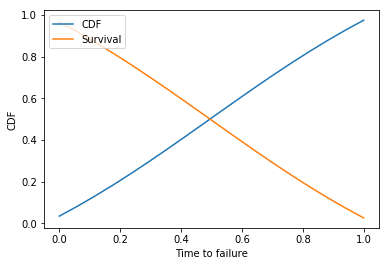

In [5]:
test = pd.read_csv('Book1.csv')
test = scaler.fit_transform(test)
r.predict_CDF(test)

area under PDF curve is [0.94062418]
Pdf obtained is


array([[0.79868218],
       [0.84748119],
       [0.8929683 ],
       [0.93395442],
       [0.96928746],
       [0.99790043],
       [1.01889354],
       [1.03157675],
       [1.03552905],
       [1.03062224],
       [1.01703012],
       [0.99521422],
       [0.96590209],
       [0.9300158 ],
       [0.88863349],
       [0.84290218],
       [0.79401755]])

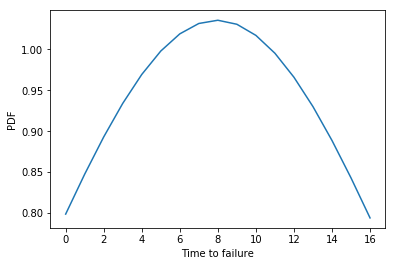

In [6]:
r.predict_PDF(test)